In [2]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np


In [3]:
# Загружаем датасет прямо из интернета
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Выведем первые несколько строк для ознакомления
print("Первые 5 строк датасета:")
display(df.head())

Первые 5 строк датасета:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
print("СТАТИСТИКА ПО ДАТАСЕТУ:")
print("=" * 50)

# 1. Размерность всего датасета
print(f"1. Размерность датасета (строки, столбцы): {df.shape}")

# 2. Количество признаков (все столбцы кроме последнего - 'species')
print(f"2. Количество признаков: {df.shape[1] - 1}")

# 3. Количество целевых классов и объектов в каждом из классов
print("3. Количество объектов по классам:")
class_counts = df['species'].value_counts()
for species, count in class_counts.items():
    print(f"   - {species}: {count} объектов")
print(f"   (Всего классов: {len(class_counts)})")

# 4. Процент объектов с неопределенными признаками
total_rows = df.shape[0]
rows_with_na = df.isnull().any(axis=1).sum()
percentage_na = (rows_with_na / total_rows) * 100
print(f"4. Процент строк с пропущенными значениями (NaN): {percentage_na:.2f}%")
print(f"   (Абсолютное значение: {rows_with_na} из {total_rows} строк)")

# 5. Иные ключевые характеристики датасета
print("5. Общая информация о датасете:")
print(df.info())
print("\n   Основные статистики по числовым признакам:")
display(df.describe())

СТАТИСТИКА ПО ДАТАСЕТУ:
1. Размерность датасета (строки, столбцы): (344, 7)
2. Количество признаков: 6
3. Количество объектов по классам:
   - Adelie: 152 объектов
   - Gentoo: 124 объектов
   - Chinstrap: 68 объектов
   (Всего классов: 3)
4. Процент строк с пропущенными значениями (NaN): 3.20%
   (Абсолютное значение: 11 из 344 строк)
5. Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

   Основные статистики по числовым 

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
# Выбираем три класса (все существующие виды пингвинов в датасете)
selected_species = ['Adelie', 'Chinstrap', 'Gentoo']

# Выбираем четыре количественных признака (из доступных числовых столбцов)
selected_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

print("ВЫБРАННЫЕ ПАРАМЕТРЫ ДЛЯ ФИЛЬТРАЦИИ:")
print("=" * 50)
print(f"Целевые классы: {selected_species}")
print(f"Признаки для анализа: {selected_features}")

ВЫБРАННЫЕ ПАРАМЕТРЫ ДЛЯ ФИЛЬТРАЦИИ:
Целевые классы: ['Adelie', 'Chinstrap', 'Gentoo']
Признаки для анализа: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [6]:
# Создаем отфильтрованный датасет только с выбранными классами
filtered_df = df[df['species'].isin(selected_species)].copy()

# Оставляем только нужные столбцы (выбранные признаки + целевой класс)
columns_to_keep = selected_features + ['species']
filtered_df = filtered_df[columns_to_keep]

# Удаляем строки с пропущенными значениями в любом из выбранных признаков
initial_count = filtered_df.shape[0]
filtered_df_clean = filtered_df.dropna(subset=selected_features)
final_count = filtered_df_clean.shape[0]
removed_count = initial_count - final_count

print("ФОРМИРОВАНИЕ ОТФИЛЬТРОВАННОГО ДАТАСЕТА:")
print("=" * 50)
print(f"Размер датасета после отбора классов: {initial_count} строк")
print(f"Удалено строк с пропущенными значениями: {removed_count}")
print(f"Итоговый размер чистого датасета: {final_count} строк")
print(f"Процент сохраненных данных: {(final_count/initial_count*100):.1f}%")

# Выводим информацию о финальном датасете
print("\nИНФОРМАЦИЯ О ФИНАЛЬНОМ ОТФИЛЬТРОВАННОМ ДАТАСЕТЕ:")
print("=" * 50)
print(f"Размерность: {filtered_df_clean.shape}")
print("\nКоличество объектов в каждом классе после фильтрации:")
print(filtered_df_clean['species'].value_counts())
print("\nПервые 5 строк финального датасета:")
display(filtered_df_clean.head())

ФОРМИРОВАНИЕ ОТФИЛЬТРОВАННОГО ДАТАСЕТА:
Размер датасета после отбора классов: 344 строк
Удалено строк с пропущенными значениями: 2
Итоговый размер чистого датасета: 342 строк
Процент сохраненных данных: 99.4%

ИНФОРМАЦИЯ О ФИНАЛЬНОМ ОТФИЛЬТРОВАННОМ ДАТАСЕТЕ:
Размерность: (342, 5)

Количество объектов в каждом классе после фильтрации:
species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

Первые 5 строк финального датасета:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
5,39.3,20.6,190.0,3650.0,Adelie


In [7]:
# Импортируем необходимые библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt

# Настраиваем визуализацию
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (15, 12)

# Создаем отфильтрованный датасет (как в предыдущем шаге)
selected_species = ['Adelie', 'Chinstrap', 'Gentoo']
selected_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

filtered_df = df[df['species'].isin(selected_species)].copy()
filtered_df_clean = filtered_df[selected_features + ['species']].dropna()

print("ВИЗУАЛИЗАЦИЯ ДАТАСЕТА")
print("=" * 50)
print(f"Размер датасета для визуализации: {filtered_df_clean.shape}")

ВИЗУАЛИЗАЦИЯ ДАТАСЕТА
Размер датасета для визуализации: (342, 5)


1. МАТРИЦА ДИАГРАММ РАССЕЯНИЯ ДЛЯ ВСЕХ ПАР ПЕРЕМЕННЫХ
--------------------------------------------------


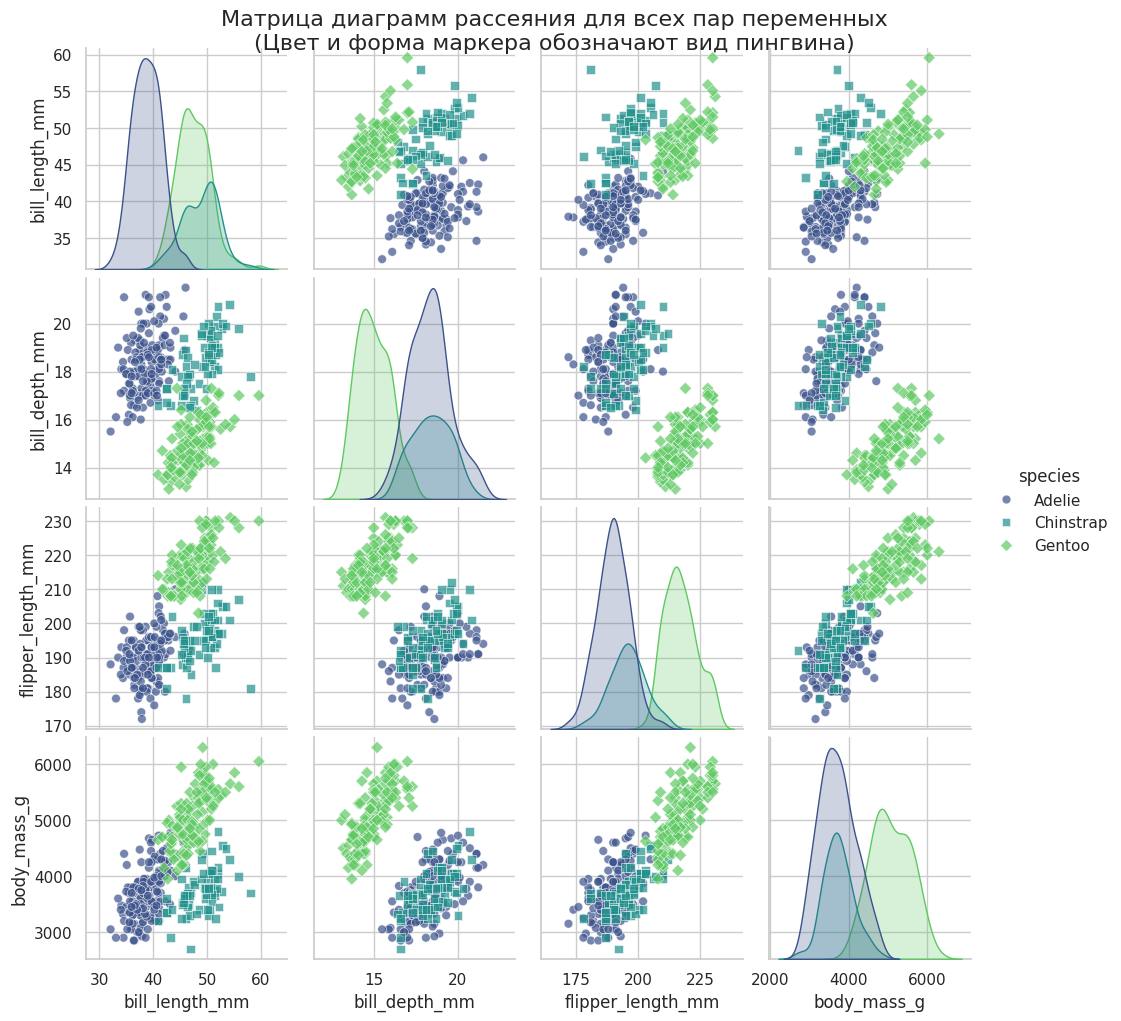

In [8]:
print("1. МАТРИЦА ДИАГРАММ РАССЕЯНИЯ ДЛЯ ВСЕХ ПАР ПЕРЕМЕННЫХ")
print("-" * 50)

# Создаем матрицу scatter plot
pair_grid = sns.pairplot(
    data=filtered_df_clean,
    vars=selected_features,  # используем только выбранные количественные признаки
    hue='species',           # цветом обозначаем классы
    palette='viridis',       # цветовая схема
    markers=['o', 's', 'D'], # разные маркеры для разных классов: кружок, квадрат, ромб
    height=2.5,              # высота каждого subplot
    plot_kws={'alpha': 0.7, 's': 40}  # прозрачность и размер точек
)

# Добавляем заголовок
pair_grid.fig.suptitle('Матрица диаграмм рассеяния для всех пар переменных\n(Цвет и форма маркера обозначают вид пингвина)', 
                      y=1.02, fontsize=16)

plt.show()


2. ОТДЕЛЬНЫЕ ДИАГРАММЫ РАССЕЯНИЯ ДЛЯ КАЖДОЙ ПАРЫ ПЕРЕМЕННЫХ
--------------------------------------------------


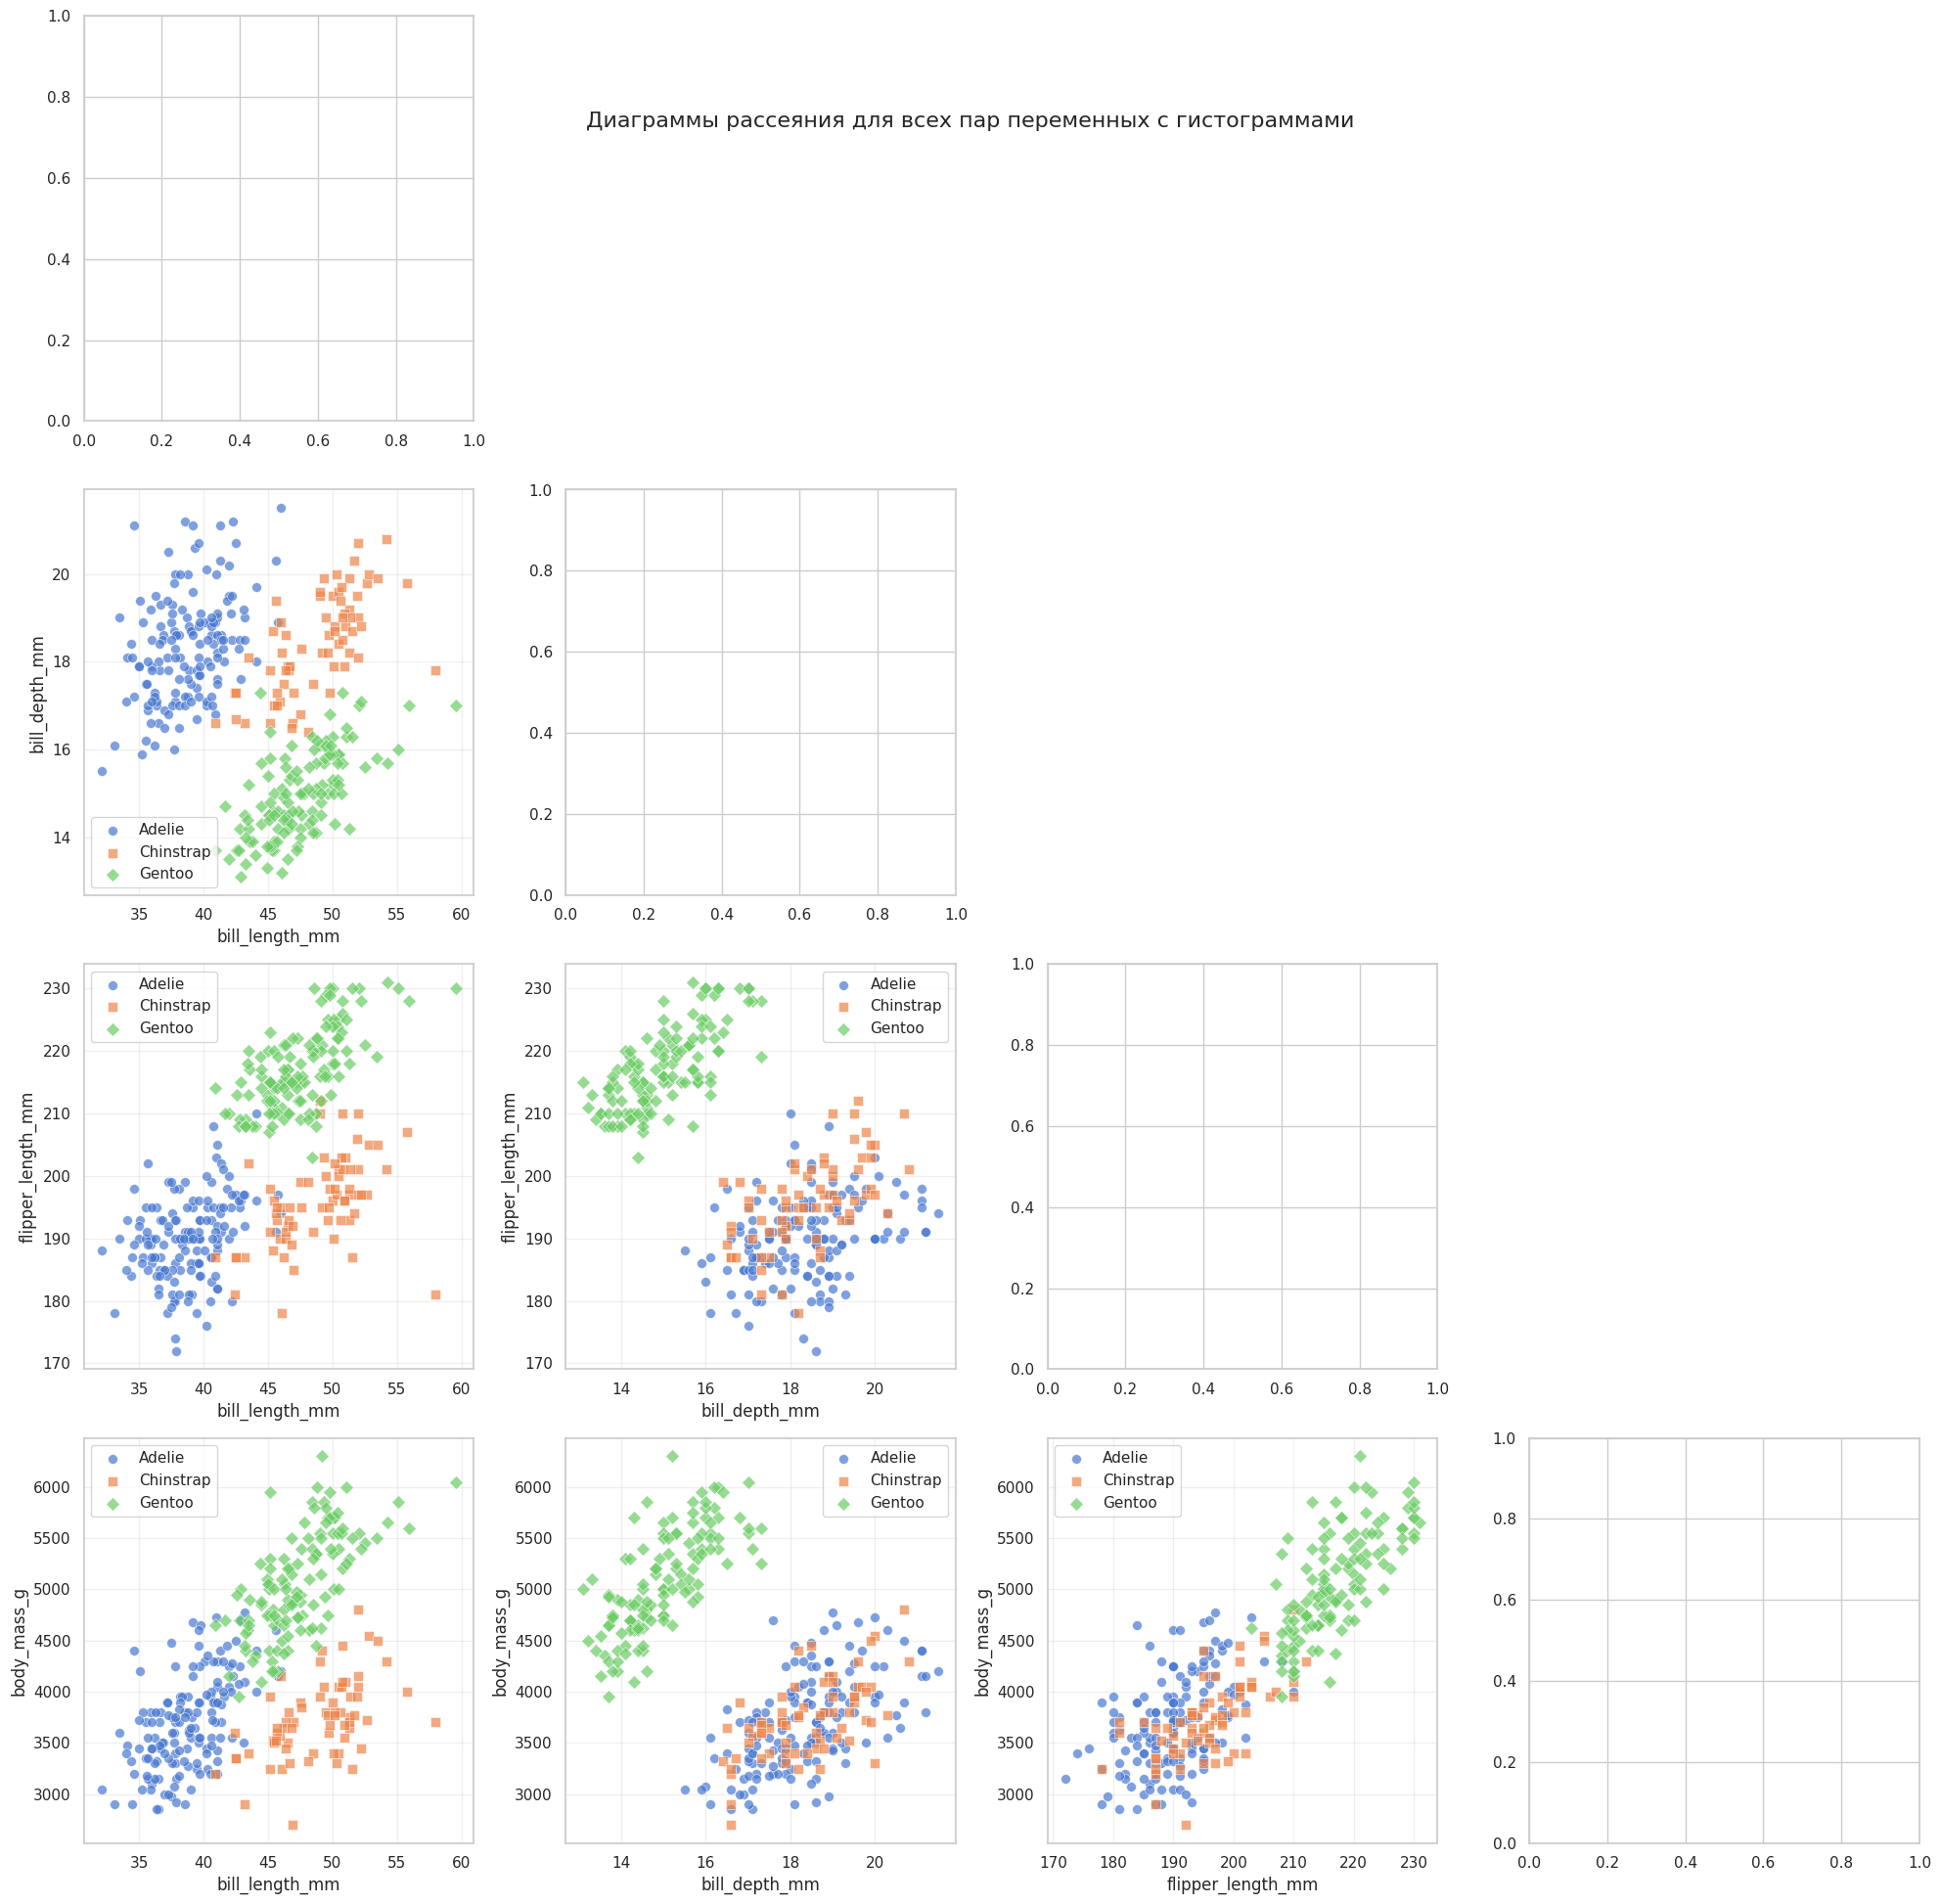

In [9]:
print("\n2. ОТДЕЛЬНЫЕ ДИАГРАММЫ РАССЕЯНИЯ ДЛЯ КАЖДОЙ ПАРЫ ПЕРЕМЕННЫХ")
print("-" * 50)

# Создаем фигуру с 4x4 subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Диаграммы рассеяния для всех пар переменных с гистограммами', fontsize=16, y=0.92)

# Убираем лишние subplots
for i in range(4):
    for j in range(4):
        if i == j:
            continue  # эти ячейки заполним гистограммами
        if i < j:
            axes[i, j].set_visible(False)  # убираем верхний треугольник
            continue

# Заполняем диаграммы рассеяния
for i in range(4):
    for j in range(4):
        if i > j:  # только нижний треугольник
            x_feature = selected_features[j]
            y_feature = selected_features[i]
            
            # Scatter plot для каждой пары переменных
            for species_idx, species in enumerate(selected_species):
                species_data = filtered_df_clean[filtered_df_clean['species'] == species]
                axes[i, j].scatter(
                    species_data[x_feature], 
                    species_data[y_feature],
                    alpha=0.7,
                    s=50,
                    marker=['o', 's', 'D'][species_idx],  # разные маркеры
                    label=species,
                    edgecolors='w',
                    linewidth=0.5
                )
            
            axes[i, j].set_xlabel(x_feature)
            axes[i, j].set_ylabel(y_feature)
            axes[i, j].legend()
            axes[i, j].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


3. ГИСТОГРАММЫ И ПЛОТНОСТИ РАСПРЕДЕЛЕНИЯ ДЛЯ КАЖДОЙ ПЕРЕМЕННОЙ
--------------------------------------------------


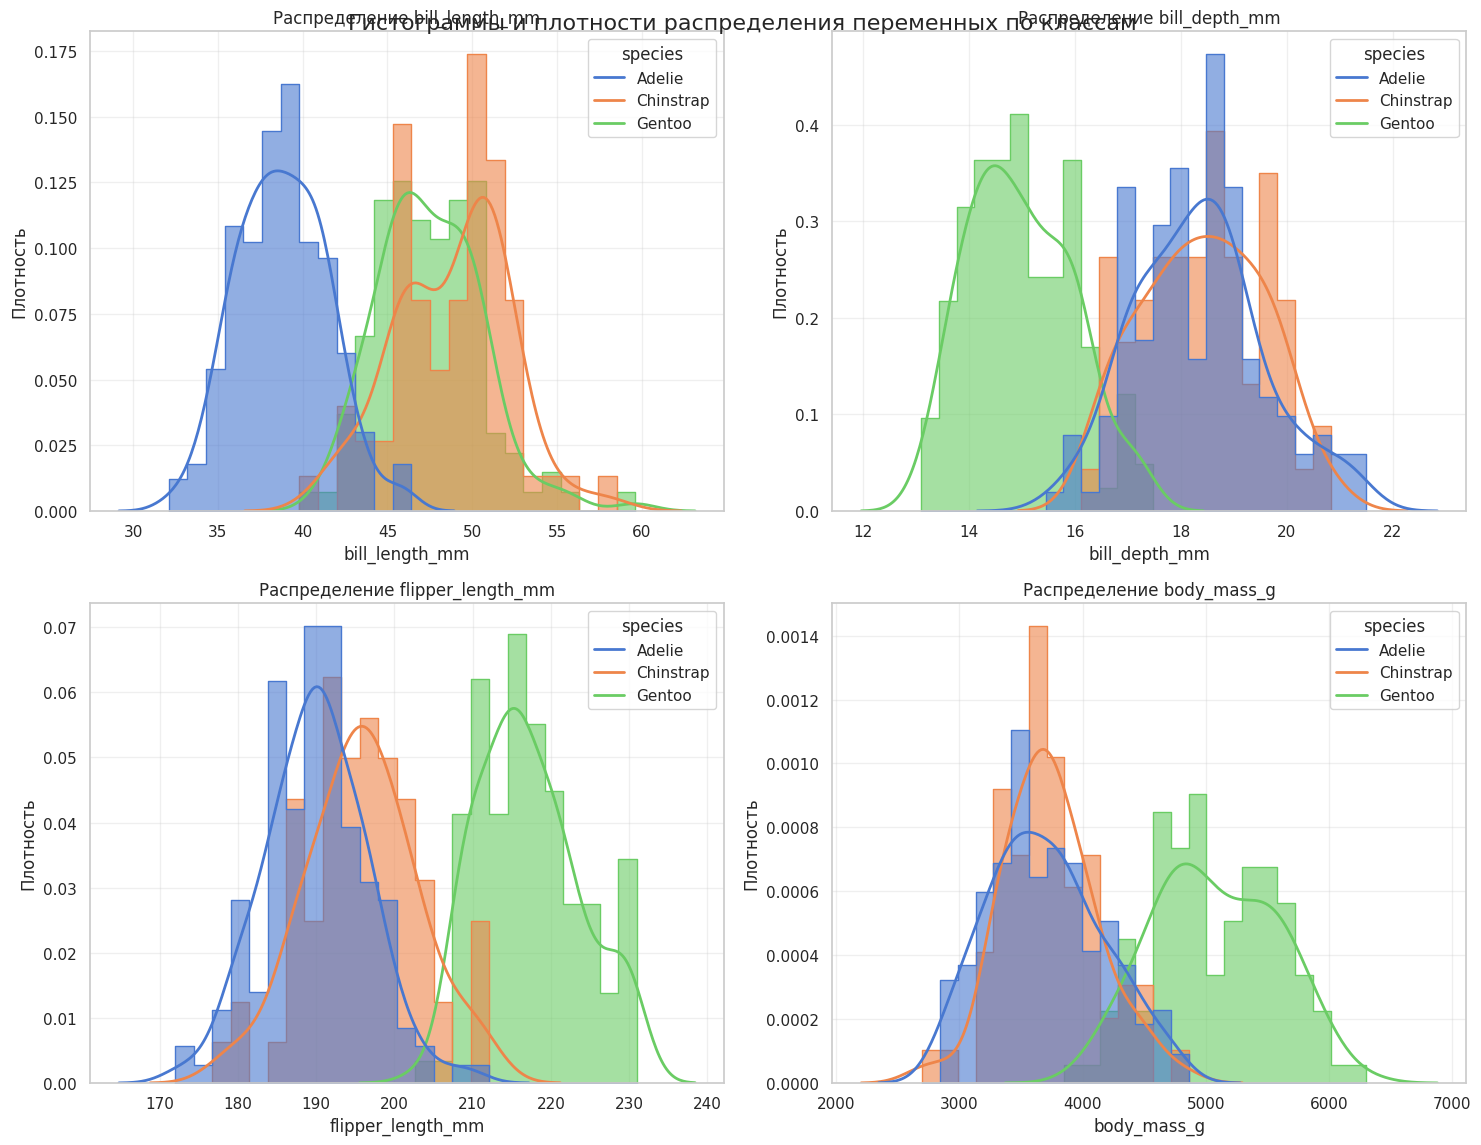

In [10]:
print("\n3. ГИСТОГРАММЫ И ПЛОТНОСТИ РАСПРЕДЕЛЕНИЯ ДЛЯ КАЖДОЙ ПЕРЕМЕННОЙ")
print("-" * 50)

# Создаем фигуру для гистограмм
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Гистограммы и плотности распределения переменных по классам', fontsize=16, y=0.95)

axes = axes.flatten()

for idx, feature in enumerate(selected_features):
    # Гистограммы с плотностью распределения
    sns.histplot(
        data=filtered_df_clean,
        x=feature,
        hue='species',
        element='step',  # ступенчатый вид гистограмм
        stat='density',  # плотность вместо количества
        common_norm=False,  # нормализация отдельно для каждого класса
        alpha=0.6,
        bins=25,  # достаточное количество разбиений
        ax=axes[idx]
    )
    
    # Добавляем KDE plot поверх гистограмм
    sns.kdeplot(
        data=filtered_df_clean,
        x=feature,
        hue='species',
        common_norm=False,
        ax=axes[idx],
        linewidth=2
    )
    
    axes[idx].set_title(f'Распределение {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Плотность')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


4. BOX PLOTS ДЛЯ СРАВНЕНИЯ РАСПРЕДЕЛЕНИЙ МЕЖДУ КЛАССАМИ
--------------------------------------------------


/tmp/ipykernel_1127/2092498765.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_1127/2092498765.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_1127/2092498765.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_1127/2092498765.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


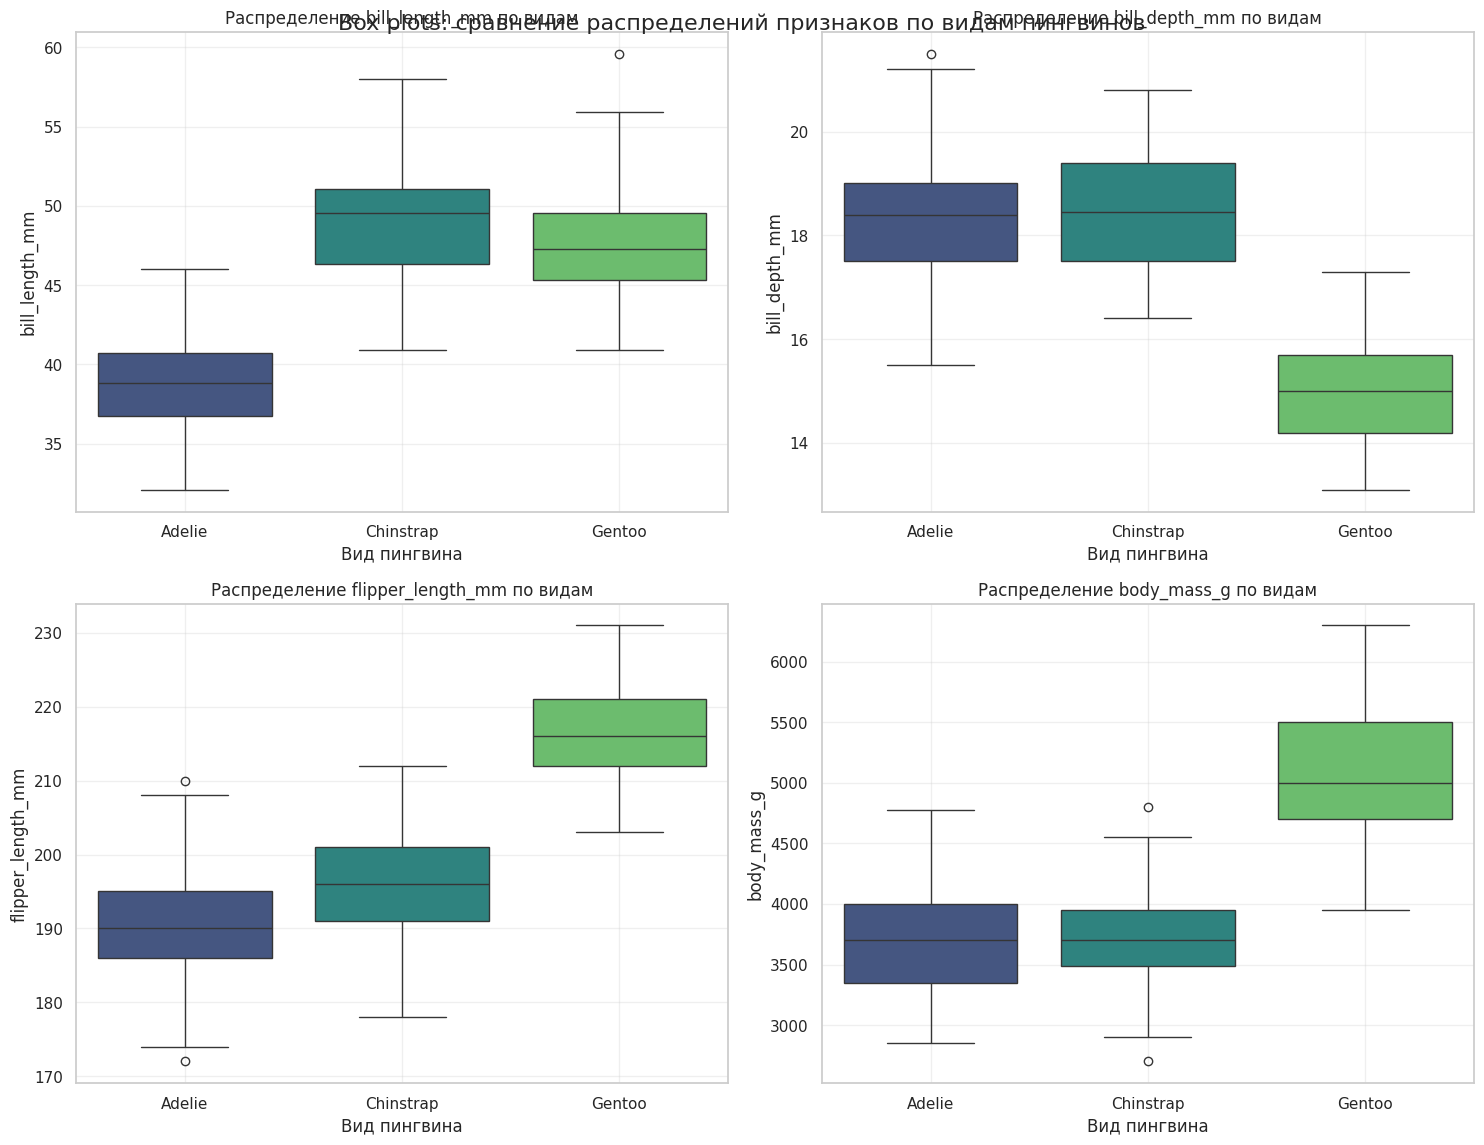

In [11]:
print("\n4. BOX PLOTS ДЛЯ СРАВНЕНИЯ РАСПРЕДЕЛЕНИЙ МЕЖДУ КЛАССАМИ")
print("-" * 50)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Box plots: сравнение распределений признаков по видам пингвинов', fontsize=16, y=0.95)

axes = axes.flatten()

for idx, feature in enumerate(selected_features):
    sns.boxplot(
        data=filtered_df_clean,
        x='species',
        y=feature,
        ax=axes[idx],
        palette='viridis'
    )
    axes[idx].set_title(f'Распределение {feature} по видам')
    axes[idx].set_xlabel('Вид пингвина')
    axes[idx].set_ylabel(feature)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
print("\n5. СТАТИСТИЧЕСКАЯ ИНФОРМАЦИЯ ДЛЯ ИНТЕРПРЕТАЦИИ ГРАФИКОВ")
print("-" * 50)

print("Описательная статистика по каждому виду:")
for species in selected_species:
    print(f"\n{species}:")
    display(filtered_df_clean[filtered_df_clean['species'] == species][selected_features].describe().round(2))

print("\nКорреляционная матрица:")
correlation_matrix = filtered_df_clean[selected_features].corr()
display(correlation_matrix.round(3))


5. СТАТИСТИЧЕСКАЯ ИНФОРМАЦИЯ ДЛЯ ИНТЕРПРЕТАЦИИ ГРАФИКОВ
--------------------------------------------------
Описательная статистика по каждому виду:

Adelie:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,151.00,151.00,151.00,151.00
mean,38.79,18.35,189.95,3700.66
std,2.66,1.22,6.54,458.57
min,32.10,15.50,172.00,2850.00
25%,36.75,17.50,186.00,3350.00
50%,38.80,18.40,190.00,3700.00
75%,40.75,19.00,195.00,4000.00
max,46.00,21.50,210.00,4775.00



Chinstrap:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,68.00,68.00,68.00,68.00
mean,48.83,18.42,195.82,3733.09
std,3.34,1.14,7.13,384.34
min,40.90,16.40,178.00,2700.00
25%,46.35,17.50,191.00,3487.50
50%,49.55,18.45,196.00,3700.00
75%,51.08,19.40,201.00,3950.00
max,58.00,20.80,212.00,4800.00



Gentoo:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,123.00,123.00,123.00,123.00
mean,47.50,14.98,217.19,5076.02
std,3.08,0.98,6.48,504.12
min,40.90,13.10,203.00,3950.00
25%,45.30,14.20,212.00,4700.00
50%,47.30,15.00,216.00,5000.00
75%,49.55,15.70,221.00,5500.00
max,59.60,17.30,231.00,6300.00



Корреляционная матрица:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000,-0.235,0.656,0.595
bill_depth_mm,-0.235,1.000,-0.584,-0.472
flipper_length_mm,0.656,-0.584,1.000,0.871
body_mass_g,0.595,-0.472,0.871,1.000
